In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [88]:
# configure visuals
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load and Inspect Data

In [89]:
df = pd.read_csv('data/raw/customer_churn.csv')
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [90]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

## Statistical Summary

### Some stats of the data...

In [91]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


### Looking at the categorical columns

In [92]:
# summary of categorical columns
print("\nCategorical Features Summary:")
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in cat_cols:
    print(f"\n{col}:")
    display(df[col].value_counts()) # get the count of unique values
    print(f"Unique values: {df[col].nunique()}")



Categorical Features Summary:

customerID:


customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Unique values: 7043

gender:


gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values: 2

Partner:


Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values: 2

Dependents:


Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values: 2

PhoneService:


PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values: 2

MultipleLines:


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values: 3

InternetService:


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values: 3

OnlineSecurity:


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values: 3

OnlineBackup:


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Unique values: 3

DeviceProtection:


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

Unique values: 3

TechSupport:


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Unique values: 3

StreamingTV:


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Unique values: 3

StreamingMovies:


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Unique values: 3

Contract:


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Unique values: 3

PaperlessBilling:


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Unique values: 2

PaymentMethod:


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Unique values: 4

TotalCharges:


TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Unique values: 6531

Churn:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Unique values: 2


### Distribution Analysis

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


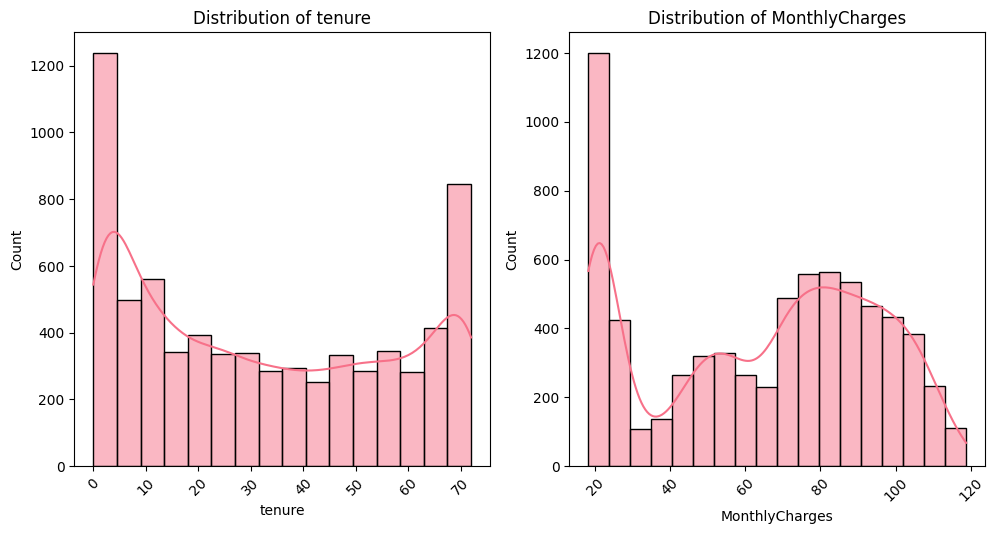

In [95]:
# function to plot distribution for numerical features
def plot_dist(df, columns, rows=3):
    plt.figure(figsize=(15, 5*rows))
    for i, c in enumerate(columns,1):
        plt.subplot(rows, 3, i)
        sns.histplot(data=df,x=c,kde=True)
        plt.title(f'Distribution of {c}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)
plot_dist(df, numerical_cols.delete(0)) # remove the first column as it is a boolean 

### Categorical Analysis

17
1 gender
2 Partner
3 Dependents
4 PhoneService
5 MultipleLines
6 InternetService
7 OnlineSecurity
8 OnlineBackup
9 DeviceProtection
10 TechSupport
11 StreamingTV
12 StreamingMovies
13 Contract
14 PaperlessBilling
15 PaymentMethod
16 TotalCharges
17 Churn


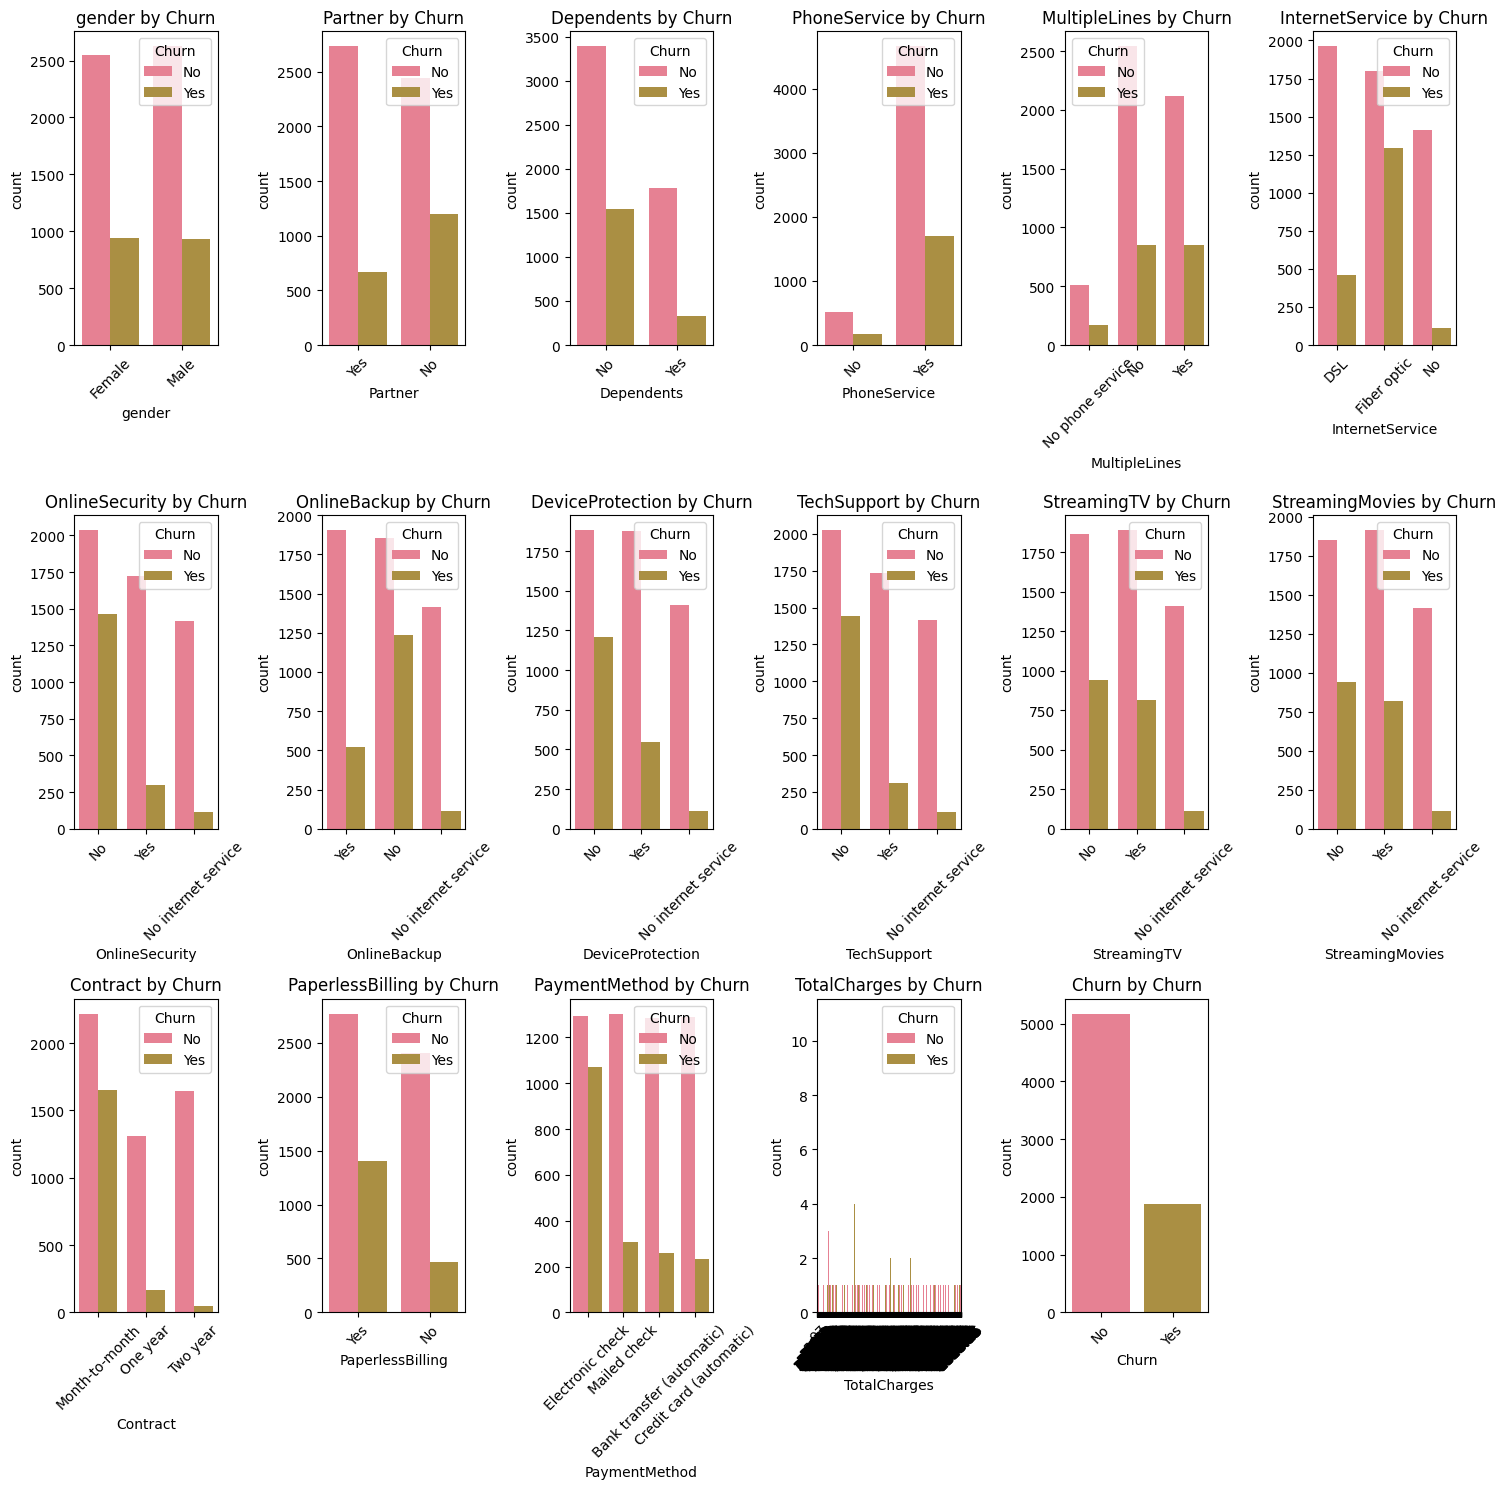

In [94]:
# function to plot distribution of categorical variables
def plot_categorical_features(df, columns, target='Churn', rows=3):
    plt.figure(figsize=(15, 5*rows))
    for i, col in enumerate(columns, 1):
        print(i, col)
        plt.subplot(rows, 6, i)
        sns.countplot(data=df,x=col,hue=target)
        plt.title(f'{col} by {target}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

categorial_columns = df.select_dtypes(include=['object', 'bool']).columns
print(len(categorial_columns.delete(0)))
plot_categorical_features(df, categorial_columns.delete(0))

### Correlation Matrix

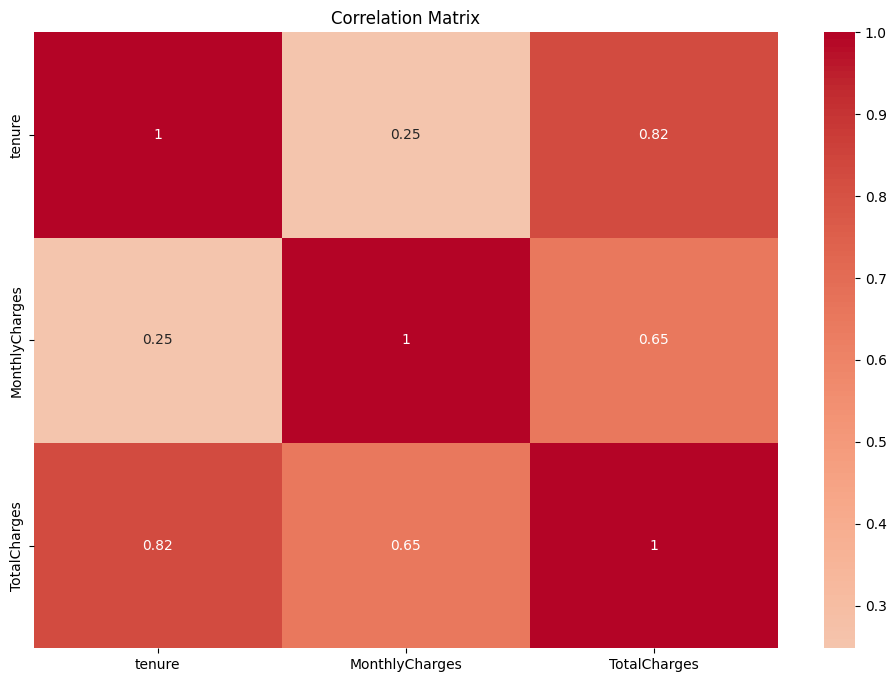

In [77]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

TotalCharges and Tenure have a strong positive correlation. Lower charges means better tenure.<br>
Interestingly, MonthlyCharges and Tenure have low positive correlation which means customers seem to care more about their total charges as opposed to monthly charges when it comes to tenure